<a href="https://colab.research.google.com/github/greengerong/awesome-llm/blob/main/colab/img/RMBG_1_4_%E9%80%8F%E6%98%8E%E8%83%8C%E6%99%AF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 环境安装

- 模型主页:[RMBG-1.4](https://huggingface.co/briaai/RMBG-1.4/tree/main)
- 在线体验环境:[BRIA-RMBG-1.4](https://huggingface.co/spaces/briaai/BRIA-RMBG-1.4)

In [1]:
!git clone https://huggingface.co/briaai/RMBG-1.4
%cd RMBG-1.4/
!pip install -r requirements.txt


Cloning into 'RMBG-1.4'...
remote: Enumerating objects: 291, done.
remote: Counting objects: 100% (153/153), done.
remote: Compressing objects: 100% (153/153), done.
remote: Total 291 (delta 83), reused 0 (delta 0), pack-reused 138
Receiving objects: 100% (291/291), 2.07 MiB | 4.42 MiB/s, done.
Resolving deltas: 100% (154/154), done.
Filtering content: 100% (6/6), 550.52 MiB | 59.37 MiB/s, done.
/content/RMBG-1.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26304 sha256=1545d8dc72cf424cfacc3e00f16fffd04ae4c3837fbd7e8eee8ef8ddad2f00a1
  Stored in directory: /root/.cache/pip/wheels/7c/d0/9e/1f26ebb66d9e1732e4098bc5a6c2d91f6c9a529838f0284890
Successfully built typing


# 推理

Input:


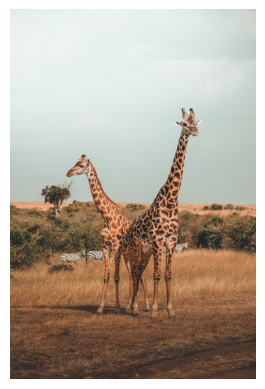

Output:


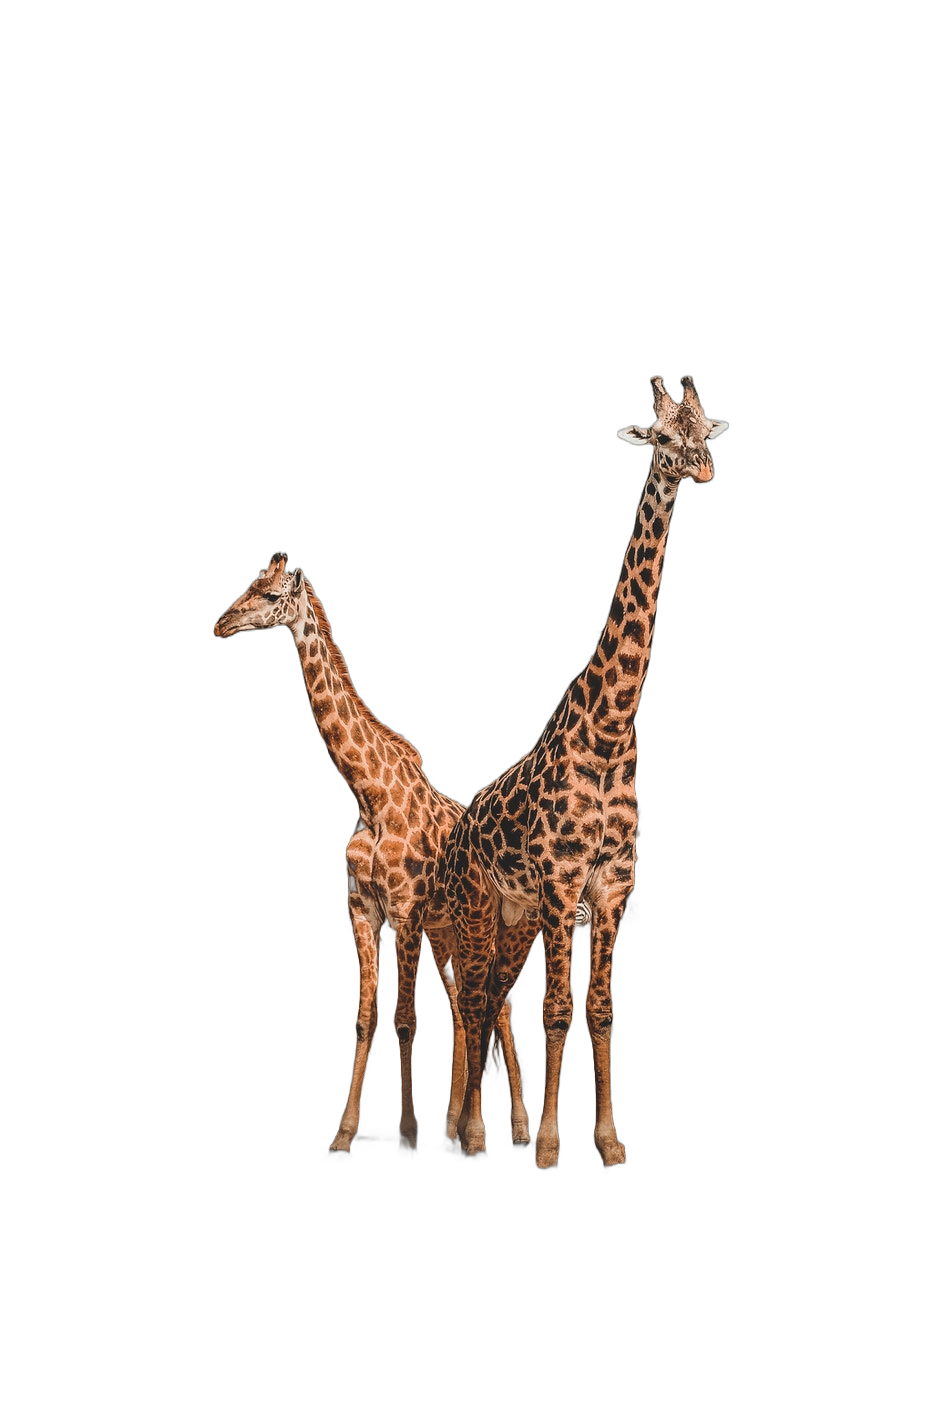

In [13]:
from skimage import io
import torch, os
from PIL import Image
from briarmbg import BriaRMBG
from utilities import preprocess_image, postprocess_image

import cv2
from matplotlib import pyplot as plt

im_path = f"/content/RMBG-1.4/example_input.jpg"

net = BriaRMBG.from_pretrained("briaai/RMBG-1.4")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net.to(device)

# prepare input
model_input_size = [1024,1024]
orig_im = io.imread(im_path)


orig_im_size = orig_im.shape[0:2]
image = preprocess_image(orig_im, model_input_size).to(device)

# inference
result=net(image)

# post process
result_image = postprocess_image(result[0][0], orig_im_size)

# save result
pil_im = Image.fromarray(result_image)
no_bg_image = Image.new("RGBA", pil_im.size, (0,0,0,0))
orig_image = Image.open(im_path)
no_bg_image.paste(orig_image, mask=pil_im)
no_bg_image.save("example_image_no_bg.png")

print('Input:')
plt.imshow(plt.imread(im_path))
plt.axis("off")
plt.show()

print('Output:')
no_bg_image

